# Single Solution Analysis of the PDE Vaccination System

In [1]:
# Load packages and set plotting settings
using CSV, DataFrames, Plots
pyplot();

# Load the scripts
include("auxilliary.jl");include("parameters.jl");include("pdesolve.jl");

# Load the data
fname = "Aug22_yR";
df_taxis = CSV.read(fname*"taxis.csv",DataFrame,header=false);
df_saxis = CSV.read(fname*"saxis.csv",DataFrame,header=false);
df_Y = CSV.read(fname*"ysol.csv",DataFrame,header=false);
df_yR = CSV.read(fname*"yRsol.csv",DataFrame,header=false);

taxis = df_taxis[:,1]; ntdwn = length(taxis); nnd = length(df_saxis[:,1])-1;
yˢsaxis = [parse(Float64,df_saxis[i,1]) for i=2:nnd+1]; 
yᵛsaxis = [parse(Float64,df_saxis[i,2]) for i=2:nnd+1];
yⁱsaxis = [parse(Float64,df_saxis[i,3]) for i=2:nnd+1];
Y = Matrix{Float64}(undef,3*nnd,ntdwn);
for i=1:ntdwn
    Y[:,i] = df_Y[:,i];
end

# Break up into solution components
yˢ = Y[1:nnd,:];
yᵛ = Y[nnd+1:2*nnd,:];
yⁱ = Y[2*nnd+1:3*nnd,:];
∫yʳ = df_yR[:,1];

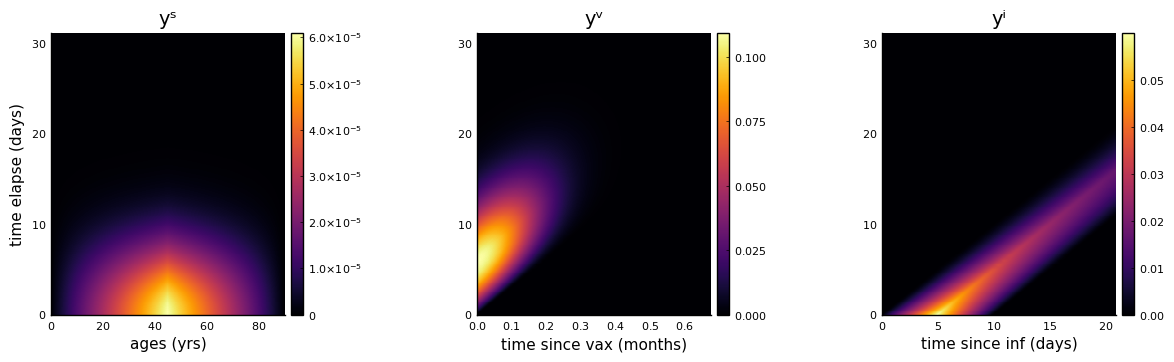

In [2]:
# note each column of heatmap should have same x-value in (x-y axes)
#  ie saxis taxis order in heatmap should move over cols then rows
p1 = heatmap(yˢsaxis/365,taxis,transpose(yˢ),xlabel="ages (yrs)",ylabel="time elapse (days)",title="yˢ");
p2 = heatmap(yᵛsaxis/31,taxis,transpose(yᵛ),xlabel="time since vax (months)",title="yᵛ");
p3 = heatmap(yⁱsaxis,taxis,transpose(yⁱ),xlabel="time since inf (days)",title="yⁱ");

lay = @layout [a b c];
plot(p1,p2,p3,layout=lay,size=(1250,350))
savefig("ysol_Aug22_lowtol2.pdf")

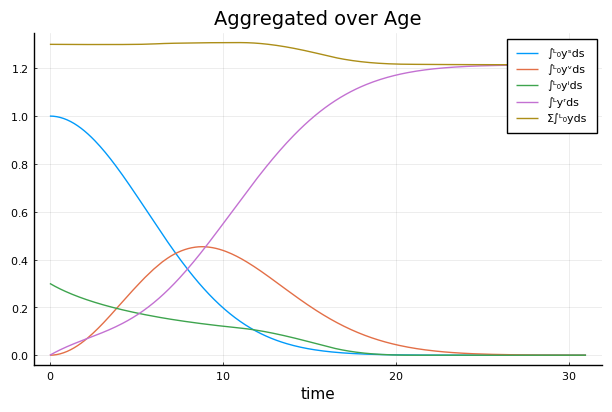

In [3]:
# plot ∫∞₀yds for each case
∫yˢ = Vector{Float64}(undef,ntdwn); ∫yᵛ = Vector{Float64}(undef,ntdwn); ∫yⁱ = Vector{Float64}(undef,ntdwn);

# Compute line ∫'s
yˢtlvl = Tℓvℓ(0.,yˢsaxis);
yᵛtlvl = Tℓvℓ(0.,yᵛsaxis);
yⁱtlvl = Tℓvℓ(0.,yⁱsaxis);
for i=1:ntdwn
    if i != 1
        Tℓvℓ!(taxis[i],yˢtlvl);
        Tℓvℓ!(taxis[i],yᵛtlvl);
        Tℓvℓ!(taxis[i],yⁱtlvl);
    end
    ∫yˢ[i] = ∫line(Yℓvℓ(yˢtlvl,yˢ[:,i]));
    ∫yᵛ[i] = ∫line(Yℓvℓ(yᵛtlvl,yᵛ[:,i]));
    ∫yⁱ[i] = ∫line(Yℓvℓ(yⁱtlvl,yⁱ[:,i]));
end

# plot them
plot(taxis,[∫yˢ,∫yᵛ,∫yⁱ,∫yʳ,∫yˢ+∫yᵛ+∫yⁱ+∫yʳ],labels=["∫ᴸ₀yˢds" "∫ᴸ₀yᵛds" "∫ᴸ₀yⁱds" "∫ᴸyʳds" "Σ∫ᴸ₀yds"],
     title="Aggregated over Age",xlabel="time")
savefig("yagg_Aug22_lowtol2.pdf")